In this notebook, we review material from previous lectures:

* [ggplot](#ggplot)
    * aesthetics
    * geometries
    * faceting
    * statistical transformations
    * position adjustments
    * coordinate transformations
* [dplyr verbs](#dplyr-verbs)
    * filter
    * arrange
    * select
    * rename
    * mutate
    * transmute
    * group_by
    * summarize
* [pipes](#pipes)
* [EDA](#EDA)
    * visualizing distributions
    * typical values
    * unusual values
    * missing values
    * covariation

# ggplot

In [1]:
#options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)
install.packages("nycflights13")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



What's wrong with this code to produce a scatter plot of `hwy` vs `displ` with the `color` aesthetic mapped to `drv`?

In [2]:
tryCatch({
  ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), color = drv) # attempt to create a scatter plot
},
error = function(err) {
 print(err)
})


<simpleError in layer(data = data, mapping = mapping, stat = stat, geom = GeomPoint,     position = position, show.legend = show.legend, inherit.aes = inherit.aes,     params = list(na.rm = na.rm, ...)): object 'drv' not found>


What does `se = FALSE` do in the code below?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



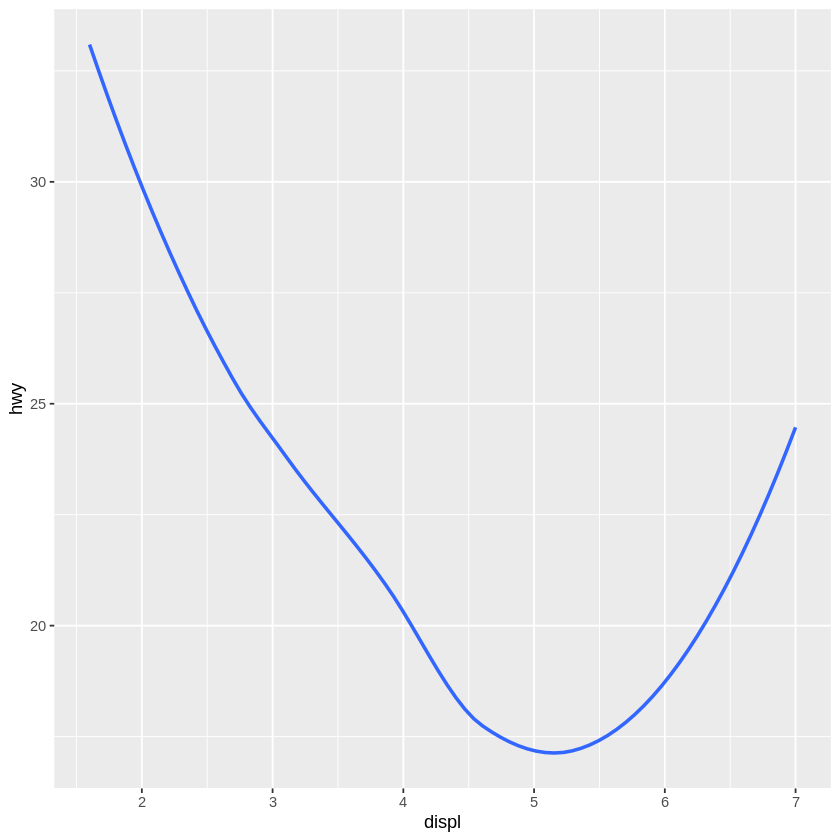

In [3]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy), se = FALSE)

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot1.png)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



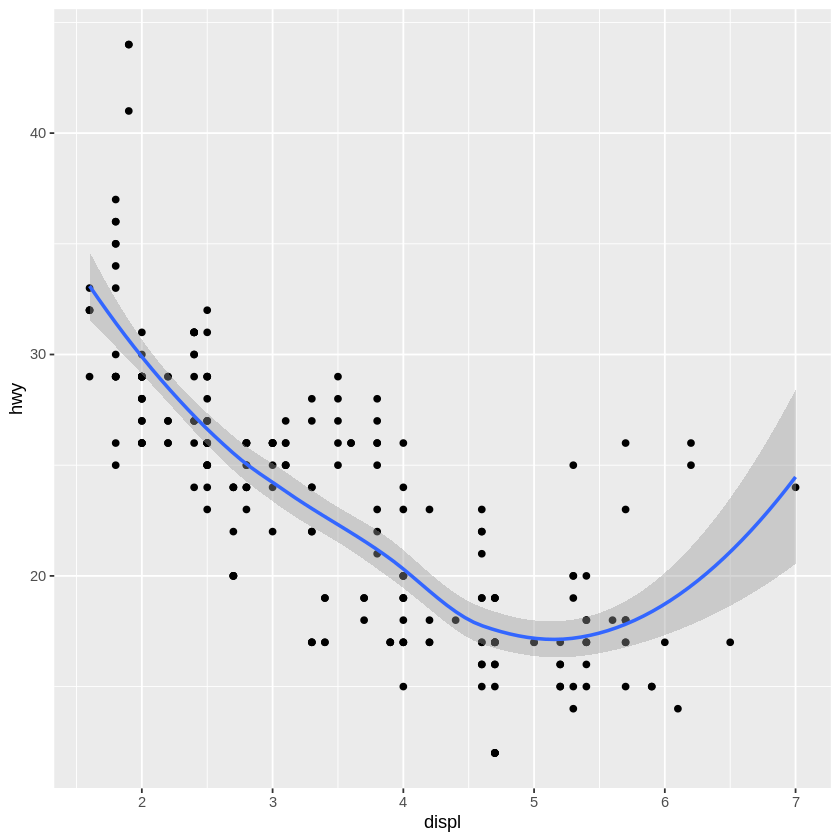

In [4]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) +
    geom_point() +
    geom_smooth()

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot2.png)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



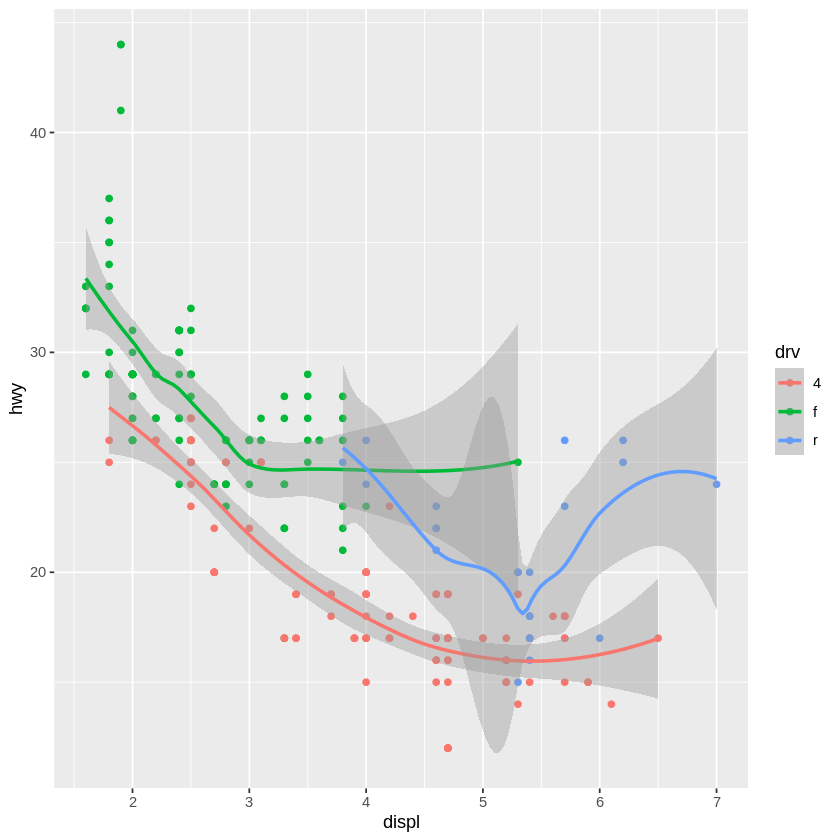

In [5]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy,color=drv)) +
    geom_point() +
    geom_smooth()

Match the geometries below with their statistical transformations.

| Geometry       | Stat     |
|----------------|----------|
| geom_point     | bin      |
| geom_histogram | count    |
| geom_bar       | identity |

Answer:

| Geometry       | Stat     |
|----------------|----------|
| geom_point     | identity |
| geom_histogram | identity |
| geom_bar       | count    |

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot3.png)

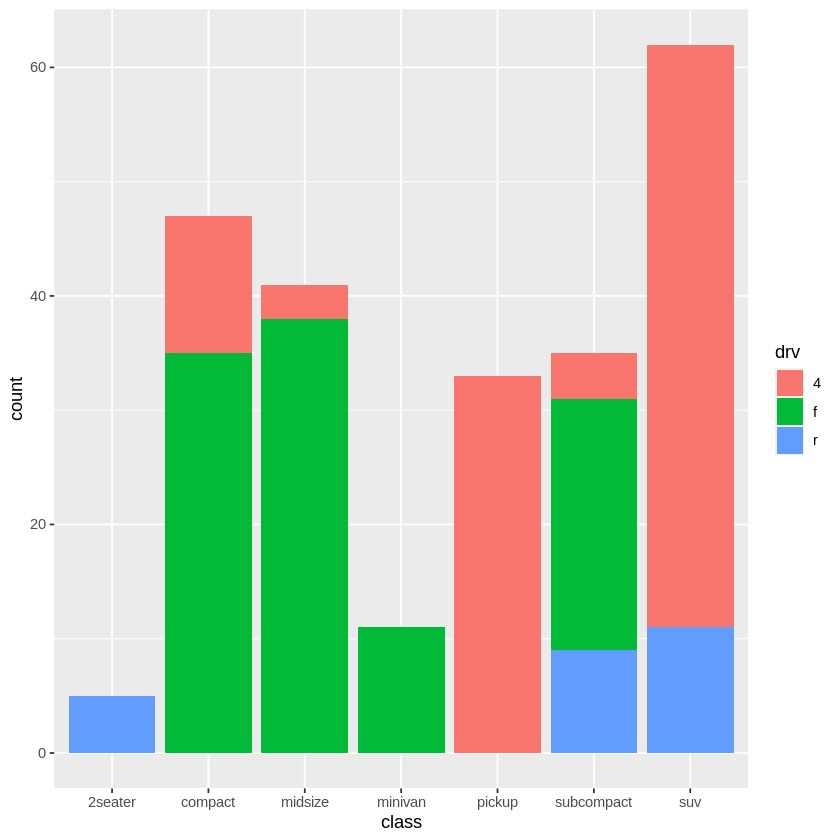

In [6]:
ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class,fill=drv))

Write the command to produce the following plot.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot4.png)

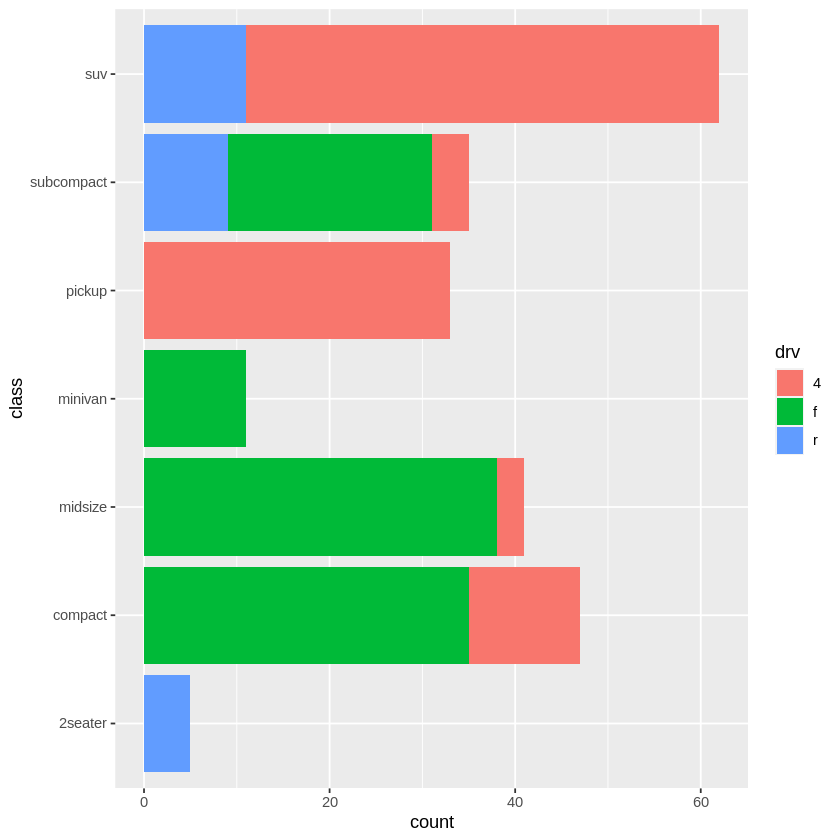

In [7]:
ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class,fill=drv)) +
    coord_flip()

# dplyr verbs

What's wrong in the code fragments below?

In [8]:
tryCatch({
  filter(mpg, drv == f) # find vehicles with front wheel drive
},
error = function(err) {
 print(err)
})

<error/dplyr_error>
Error in `h()`:
! Problem with `filter()` input `..1`.
ℹ Input `..1` is `drv == f`.
✖ object 'f' not found
Backtrace:
  1. IRkernel::main()
 34. base::.handleSimpleError(...)
 35. dplyr h(simpleError(msg, call))


In [9]:
# f should be in quotes since drv is of chr type
filter(mpg, drv == "f")

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize


In [10]:
tryCatch({
  filter(mpg, 'drv' != '4') # find vehicles that do not have 4 wheel drives
},
error = function(err) {
 print(err)
})

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [11]:
# variable name shouldn't be in quotes
filter(mpg, drv != '4')

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv


In [12]:
tryCatch({
  filter(mpg, manufacturer == toyota & class == suv) # find all suvs made by toyota
},
error = function(err) {
 print(err)
})


<error/dplyr_error>
Error in `h()`:
! Problem with `filter()` input `..1`.
ℹ Input `..1` is `manufacturer == toyota & class == suv`.
✖ object 'toyota' not found
Backtrace:
  1. IRkernel::main()
 34. base::.handleSimpleError(...)
 35. dplyr h(simpleError(msg, call))


In [13]:
# toyota and suv should be in quotes
filter(mpg, manufacturer == "toyota" & class == "suv")

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv
toyota,land cruiser wagon 4wd,5.7,2008,8,auto(s6),4,13,18,r,suv


In [14]:
tryCatch({
  n(filter(mpg, cyl == 4)) # find the number of vehicle with 4 cylinders
},
error = function(err) {
 print(err)
})

<simpleError in n(filter(mpg, cyl == 4)): unused argument (filter(mpg, cyl == 4))>


In [15]:
# nrow() computes no. of rows in a tibble (and ncol computes no. of columns), n() can only be used inside of other funcs like summarize()
nrow(filter(mpg, cyl == 4))

[1] 81

# pipes

What's wrong in the code fragments below?

In [16]:
tryCatch({
  select(mpg, hwy) %>% # show only the highway mileage of suvs sorted in descending order of the mileage
    filter(class == 'suv') %>%
    arrange(hwy)
},
error = function(err) {
 print(err)
})

<error/dplyr_error>
Error in `h()`:
! Problem with `filter()` input `..1`.
ℹ Input `..1` is `class == "suv"`.
✖ comparison (1) is possible only for atomic and list types
Backtrace:
  1. IRkernel::main()
 36. base::.handleSimpleError(...)
 37. dplyr h(simpleError(msg, call))


In [17]:
filter(mpg, class == 'suv') %>%
    select(hwy) %>%
    arrange(hwy)

hwy
<int>
12
12
14
14
15
15
15
15
15


In [18]:
tryCatch({
  # depth variable in diamonds is supposed to be the ratio (as a percentage) between z and mean of x,y
  # add a new column new_depth where we compute it ourselves
  # assign it to a variable called new_diamonds
  mutate(diamonds, new_depth <- 100*2*z/(x+y)) %>%
      new_diamonds
},
error = function(err) {
 print(err)
})


<simpleError in new_diamonds(.): could not find function "new_diamonds">


In [19]:
new_diamonds <- mutate(diamonds, new_depth = 100*2*z/(x+y))

In [20]:
# check if depth and new_depth are close to each other within machine precision
filter(new_diamonds, depth == new_depth)

carat,cut,color,clarity,depth,table,price,x,y,z,new_depth
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.71,Ideal,F,SI1,62.5,55,2788,5.71,5.65,3.55,62.5
0.80,Very Good,E,SI2,62.5,56,2804,5.88,5.96,3.70,62.5
0.79,Ideal,H,VS2,62.5,57,2844,5.91,5.93,3.70,62.5
0.80,Ideal,G,SI1,62.5,57,2870,5.94,5.90,3.70,62.5
0.62,Ideal,E,VVS2,62.0,56,2904,5.48,5.52,3.41,62.0
0.74,Premium,F,VS1,62.5,60,2917,5.78,5.74,3.60,62.5
0.70,Very Good,D,VS2,62.5,55,3052,5.65,5.71,3.55,62.5
0.32,Premium,H,VS1,62.4,58,561,4.35,4.40,2.73,62.4
0.91,Fair,E,SI2,64.5,60,3119,6.04,5.96,3.87,64.5


In [21]:
filter(new_diamonds, near(depth, new_depth))

carat,cut,color,clarity,depth,table,price,x,y,z,new_depth
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.71,Ideal,F,SI1,62.5,55,2788,5.71,5.65,3.55,62.5
0.80,Very Good,E,SI2,62.5,56,2804,5.88,5.96,3.70,62.5
0.79,Ideal,H,VS2,62.5,57,2844,5.91,5.93,3.70,62.5
0.79,Premium,D,SI2,60.0,60,2853,6.07,6.03,3.63,60.0
0.80,Ideal,G,SI1,62.5,57,2870,5.94,5.90,3.70,62.5
0.62,Ideal,E,VVS2,62.0,56,2904,5.48,5.52,3.41,62.0
0.74,Premium,F,VS1,62.5,60,2917,5.78,5.74,3.60,62.5
0.70,Very Good,D,VS2,62.5,55,3052,5.65,5.71,3.55,62.5
0.32,Premium,H,VS1,62.4,58,561,4.35,4.40,2.73,62.4


In [22]:

library(nycflights13)

tryCatch({
  # Note that distance is in miles and air_time is in minutes
  #
  # add a speed variable in m.p.h. obtained by dividing distance and air_time, then
  # select only speed and distance, then
  # plot a scatter of speed (y axis) vs distance (x axis)
  mutate(flights, speed = 60*distance/air_time) %>%
    select(flights, distance, air_time) %>%
    ggplot(mapping = aes(x = distance, y = air_time)) +
        geom_point()
},
error = function(err) {
 print(err)
})


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(flights)` instead of `flights` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


<error/vctrs_error_subscript_type>
Error:
! Must subset columns with a valid subscript vector.
✖ Subscript has the wrong type `tbl_df<
  year          : integer
  month         : integer
  day           : integer
  dep_time      : integer
  sched_dep_time: integer
  dep_delay     : double
  arr_time      : integer
  sched_arr_time: integer
  arr_delay     : double
  carrier       : character
  flight        : integer
  tailnum       : character
  origin        : character
  dest          : character
  air_time      : double
  distance      : double
  hour          : double
  minute        : double
  time_hour     : datetime<America/New_York>
>`.
ℹ It must be numeric or character.
Backtrace:
  1. IRkernel::main()
 50. rlang::cnd_signal(`<vctrs___>`)


Warning message:
“Removed 9430 rows containing missing values (geom_point).”


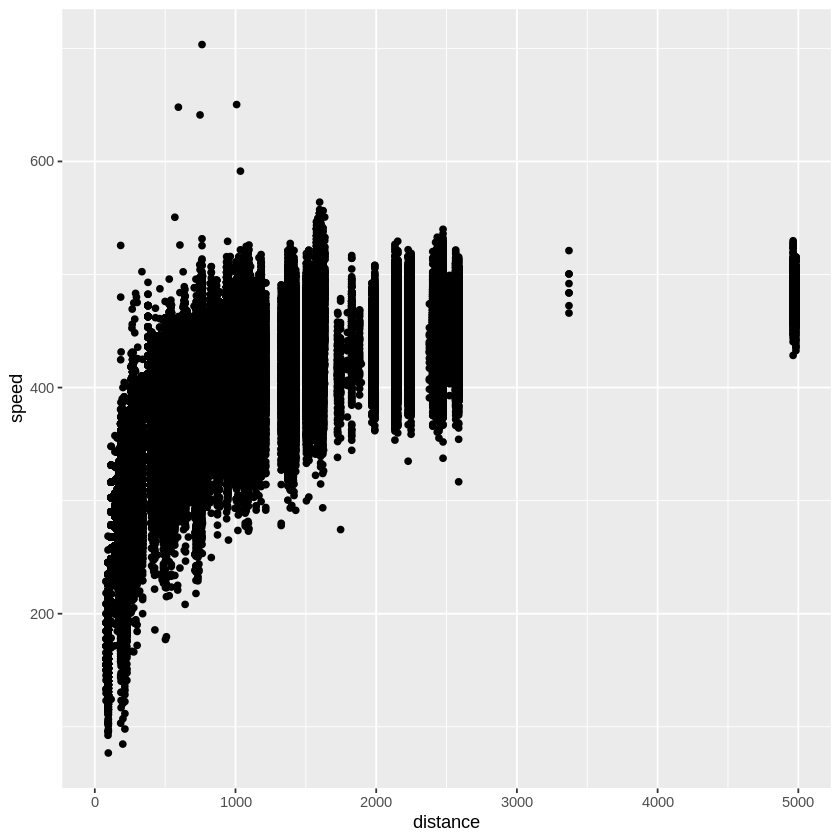

In [23]:
mutate(flights, speed = 60*distance/air_time) %>%
    select(speed, distance) %>%
    ggplot(mapping = aes(x = distance, y = speed)) +
        geom_point()

In [24]:
tryCatch({
# show a bar chart of average highway mileage of vehicle produced by each manufacturer
# manufacturer names are long so make sure to flip the coordinate axes in the bar chart
mpg %>%
    group(manufacturer) %>%
    summarize(average_hwy = mean(hwy)) %>%
    ggplot() %>%
        geom_bar(mapping = aes(x = manufacturer, y = hwy)) +
        coord_flip()
},
error = function(err) {
 print(err)
})


<simpleError in group(., manufacturer): could not find function "group">


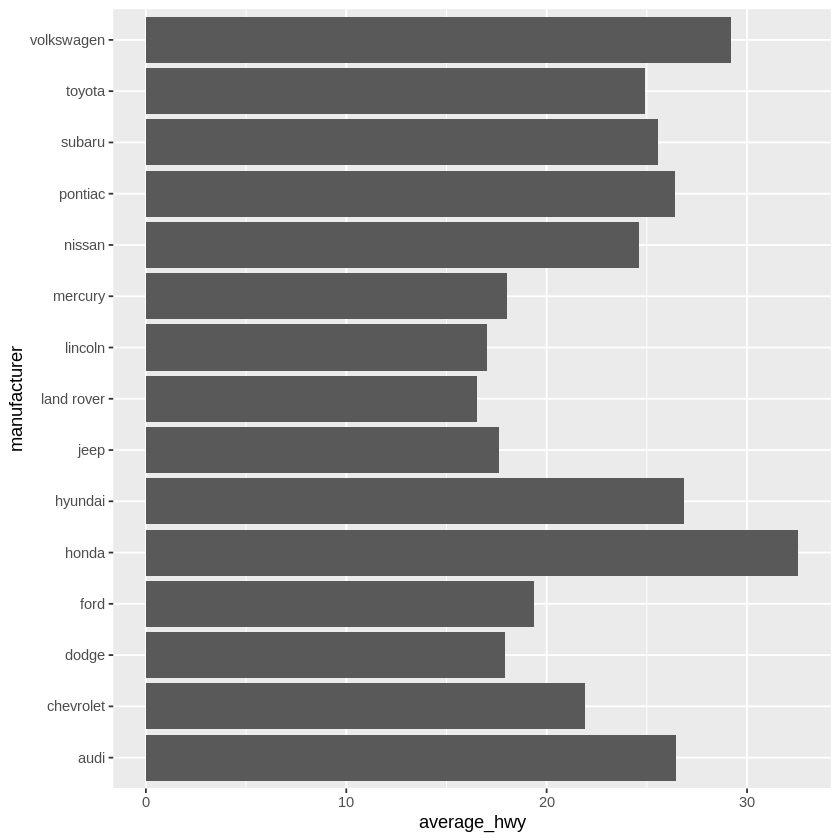

In [25]:
mpg %>%
    group_by(manufacturer) %>%
    summarize(average_hwy = mean(hwy)) %>%
    ggplot() +
        geom_bar(mapping = aes(x = manufacturer, y = average_hwy), stat = "identity") +
        coord_flip()

# EDA

Write the command to produce the following plot.

Note that the `speed` (in m.p.h.) variable has been computed using `distance` (in miles) and `air_time` (in minutes) variables. `binwidth` was 10 m.p.h.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot5.png)

Warning message:
“Removed 9430 rows containing non-finite values (stat_bin).”


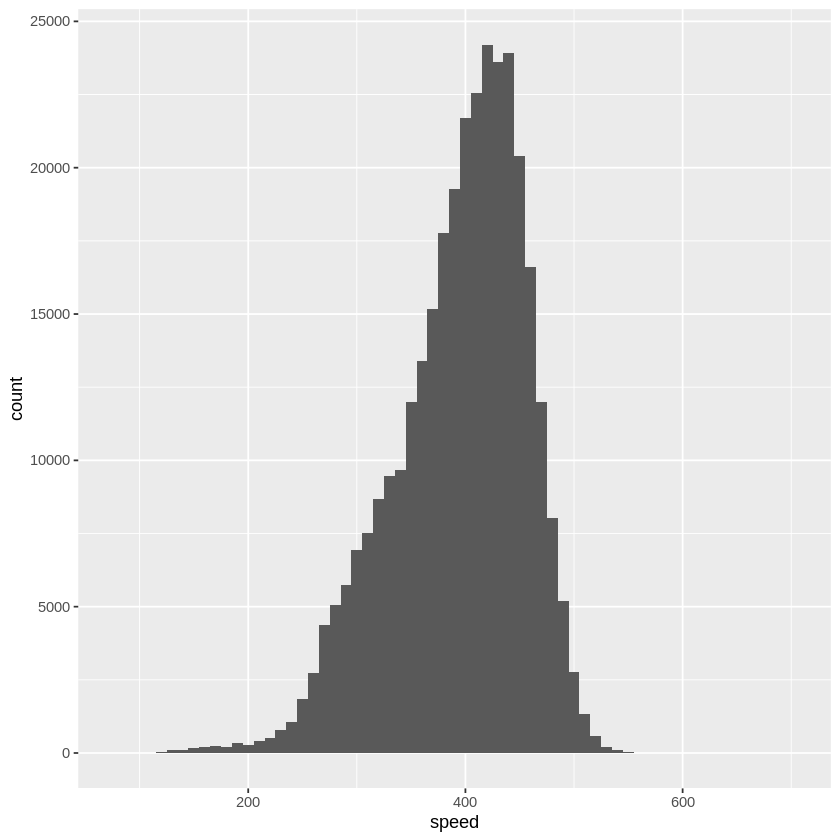

In [26]:
mutate(flights, speed = 60*distance/air_time) %>%
    ggplot() +
        geom_histogram(aes(x=speed), binwidth=10)

Write the command to produce the following plot using the `mpg` data set.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot6.png)

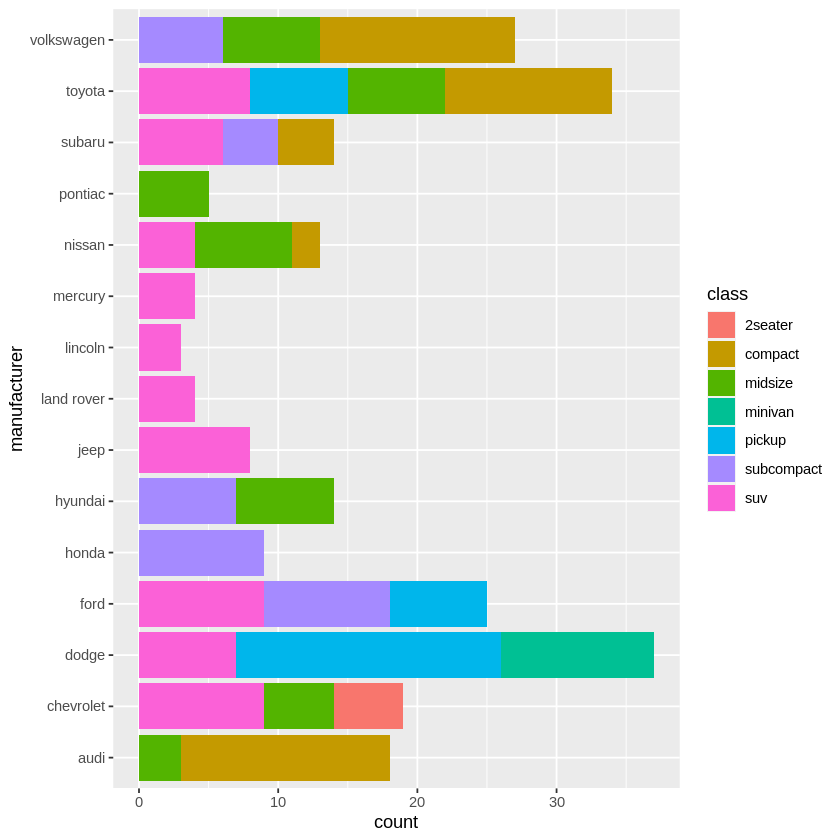

In [27]:
ggplot(mpg) +
    geom_bar(aes(x=manufacturer,fill=class)) +
    coord_flip()

Write the command to produce the following plot using the `mpg` data set.

![plot](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS306-Fall2017/Rplot7.png)

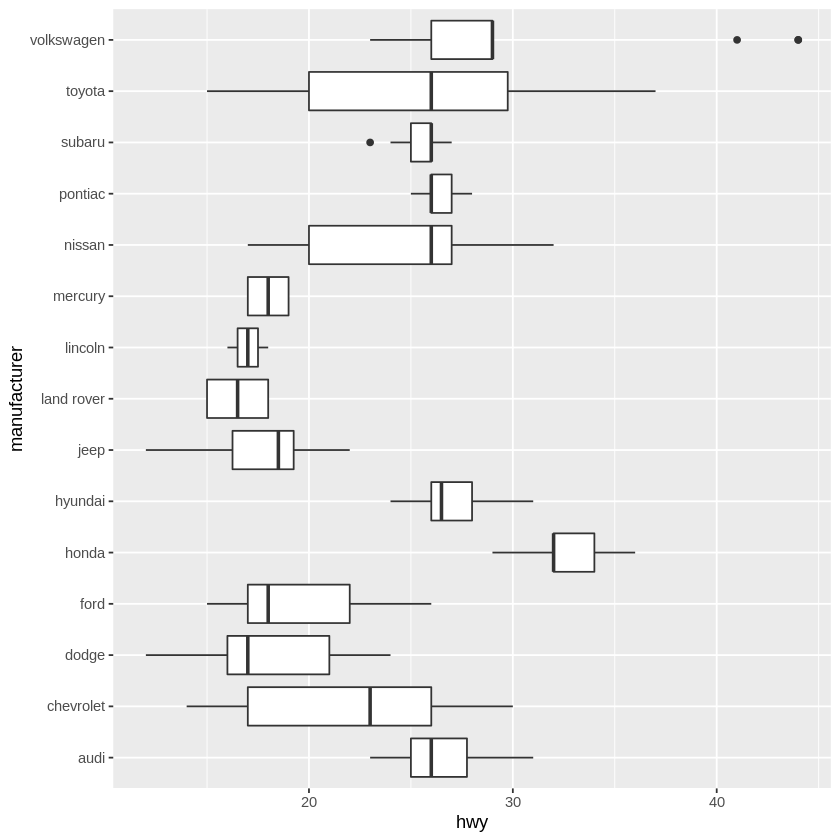

In [28]:
ggplot(mpg) +
    geom_boxplot(aes(x=manufacturer,y=hwy)) +
    coord_flip()

Write the command to produce the following plot.

Note that the `speed` (in m.p.h.) variable has been computed using `distance` (in miles) and `air_time` (in minutes) 

<img src="https://github.com/ambujtewari/stats306-winter2022/raw/main/data/Rplot8.png" width="500">

Warning message:
“Removed 9430 rows containing non-finite values (stat_bin2d).”


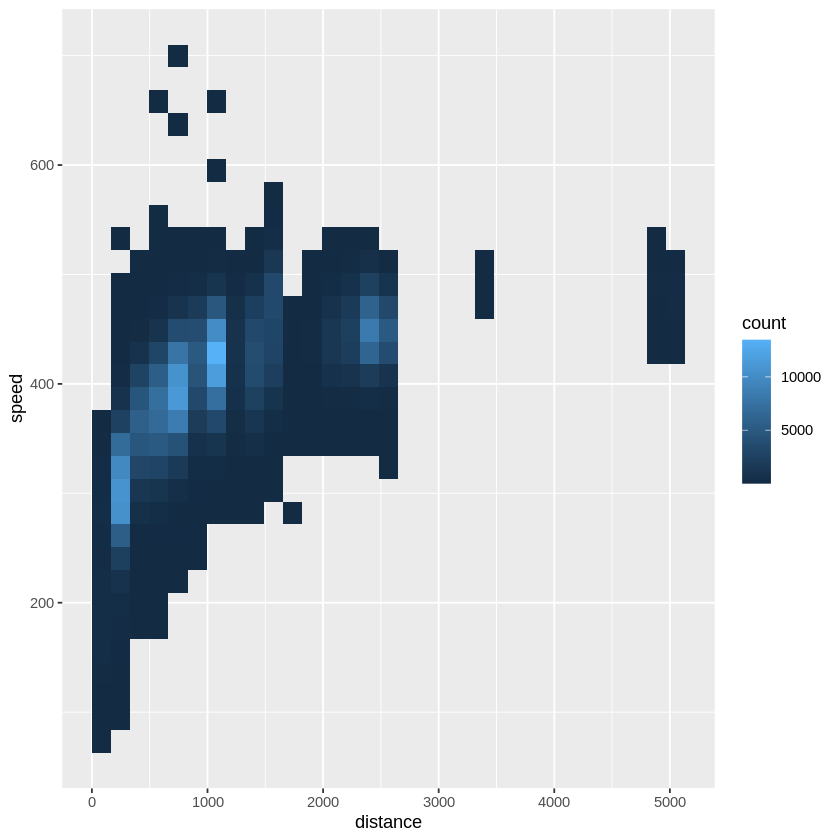

In [29]:
mutate(flights, speed = 60*distance/air_time) %>%
    select(speed, distance) %>%
    ggplot(mapping = aes(x = distance, y = speed)) +
        geom_bin2d()